# Week 6: Deep Learning Essentials

## Backpropagation 

1. Forward pass: makes prediction from the input to the output layer
2. Error Measurement: using a loss function it compares the desired output and the actual output of the network and returns some measure of error
3. Reverse pass: going backward computes how much each connection contributed to the error, until reaching the input layer
4. Gradient Descent step: tweaks the connection weights to reduce the error

## Building a Network

- 1 input layer + 1 or more hidden layers + 1 output layer
- \# input neurons = \# features 
- \# hidden layers = typically from 1 to 5 
- \# neurons per layer = typycally from 10 to 100
- hidden activation: ReLU ()
- \# output layers, output activation, loss function: depends on the problem 

## Continuous Outcomes

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston
boston = load_boston()

bdata = pd.DataFrame(boston.data, columns=boston['feature_names'])
X, y = bdata.iloc[:,:],boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- \# output neurons: 1
- output activation function: none
- loss function: MSE or Mean Absolute Error

In [2]:
from tensorflow import keras
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, input_dim = X.shape[1], activation="relu"))
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.Dense(1, activation="relu"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=["mean_squared_error"])

In [4]:
history = model.fit(X_train, y_train, epochs=8,
                    validation_split=0.2)

Epoch 1/8
11/11 [==============================] - 0s 33ms/step - loss: 137.4698 - mean_squared_error: 137.4698 - val_loss: 99.7942 - val_mean_squared_error: 99.7942
Epoch 2/8
11/11 [==============================] - 0s 11ms/step - loss: 91.5954 - mean_squared_error: 91.5954 - val_loss: 81.0520 - val_mean_squared_error: 81.0520
Epoch 3/8
11/11 [==============================] - 0s 14ms/step - loss: 86.4987 - mean_squared_error: 86.4987 - val_loss: 66.8325 - val_mean_squared_error: 66.8325
Epoch 4/8
11/11 [==============================] - 0s 15ms/step - loss: 91.1702 - mean_squared_error: 91.1702 - val_loss: 66.5525 - val_mean_squared_error: 66.5525
Epoch 5/8
11/11 [==============================] - 0s 13ms/step - loss: 78.0145 - mean_squared_error: 78.0145 - val_loss: 73.4122 - val_mean_squared_error: 73.4122
Epoch 6/8
11/11 [==============================] - 0s 15ms/step - loss: 75.3097 - mean_squared_error: 75.3097 - val_loss: 66.0881 - val_mean_squared_error: 66.0881
Epoch 7/8
11/1

In [5]:
history.history['val_mean_squared_error'][-1]

62.39632797241211

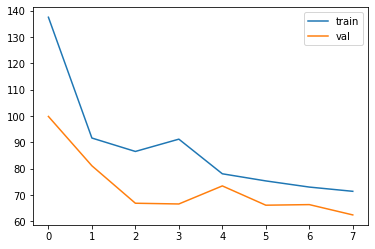

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plot performance by epoch
plt.plot(history.epoch,history.history['mean_squared_error'])
plt.plot(history.epoch,history.history['val_mean_squared_error'])
plt.legend(['train', 'val'], loc='best')

In [7]:
for lay in model.layers:
    print(lay.name)
    print(lay.get_weights())

dense
[array([[ 2.66764224e-01,  2.06221819e-01, -2.38244191e-01,
         2.92424858e-01,  2.55288273e-01,  3.24543625e-01,
         1.68320313e-01, -1.91266149e-01,  1.86640829e-01,
        -1.03274494e-01,  2.15694502e-01, -4.04949248e-01,
        -6.78017288e-02, -1.25653803e-01,  1.69925511e-01,
        -2.72768557e-01, -3.27627867e-01, -3.12039346e-01,
         3.11199367e-01,  1.82204783e-01,  5.70244193e-02,
        -1.02827400e-01,  2.95992672e-01, -1.32056162e-01,
         2.45737851e-01,  3.54350686e-01, -9.67246890e-02,
        -1.42773330e-01,  1.69927284e-01, -9.21992064e-02],
       [-8.23917761e-02,  1.83110252e-01,  3.71036381e-01,
        -7.36249983e-02, -2.88160145e-01,  8.83064866e-02,
        -2.65394449e-01, -2.65132040e-01,  3.45169514e-01,
        -2.77218342e-01,  3.71517032e-01,  2.31176734e-01,
         2.98265159e-01,  1.08074233e-01, -2.38999680e-01,
        -2.97949404e-01,  2.55520523e-01, -3.40960920e-01,
         7.06645846e-03, -6.06626868e-02,  4.595

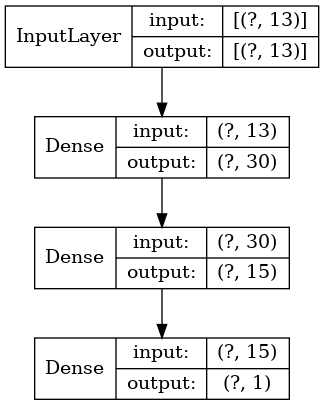

In [8]:
from IPython.display import SVG
from tensorflow.keras.utils import plot_model
plot_model(model,
                   show_shapes=True,
                   show_layer_names=False)

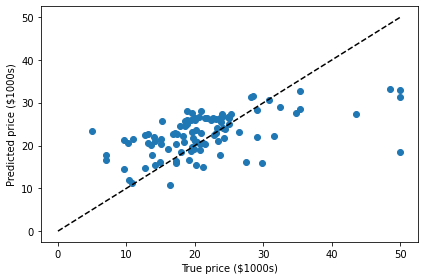

In [9]:
import numpy as np
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

## Binary Classification

In [10]:
beer_data = pd.read_csv("https://www.dropbox.com/s/5fbmj4gqktrmn00/beers.csv?dl=1")
X, y = beer_data.iloc[:, :-1], beer_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- \# output neurons: 1
- output activation function: Logistic
- loss function: binary_crossentropy

In [11]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(50, input_dim = X.shape[1], activation="relu"))
model.add(keras.layers.Dense(25, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                250       
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 1,551
Trainable params: 1,551
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=8,
                    validation_split=0.2)

Epoch 1/8
5/5 [==============================] - 0s 62ms/step - loss: 0.7125 - accuracy: 0.5278 - val_loss: 0.6979 - val_accuracy: 0.5000
Epoch 2/8
5/5 [==============================] - 0s 20ms/step - loss: 0.6839 - accuracy: 0.5278 - val_loss: 0.6855 - val_accuracy: 0.5000
Epoch 3/8
5/5 [==============================] - 0s 19ms/step - loss: 0.6677 - accuracy: 0.5278 - val_loss: 0.6736 - val_accuracy: 0.5000
Epoch 4/8
5/5 [==============================] - 0s 24ms/step - loss: 0.6529 - accuracy: 0.6042 - val_loss: 0.6650 - val_accuracy: 0.7500
Epoch 5/8
5/5 [==============================] - 0s 23ms/step - loss: 0.6440 - accuracy: 0.6667 - val_loss: 0.6584 - val_accuracy: 0.7222
Epoch 6/8
5/5 [==============================] - 0s 19ms/step - loss: 0.6337 - accuracy: 0.6806 - val_loss: 0.6531 - val_accuracy: 0.7500
Epoch 7/8
5/5 [==============================] - 0s 21ms/step - loss: 0.6268 - accuracy: 0.6944 - val_loss: 0.6498 - val_accuracy: 0.7500
Epoch 8/8
5/5 [===================

0.75


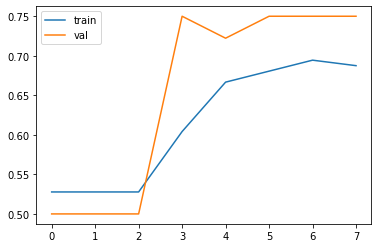

In [14]:
print(history.history['val_accuracy'][-1])
plt.plot(history.epoch,history.history['accuracy'])
plt.plot(history.epoch,history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')

In [15]:
y_pred_prob = model.predict(X_test)
y_pred = np.around(y_pred_prob) 

y_pred_prob[0:7], y_pred[0:7], y_test[0:7]

(array([[0.7242385 ],
        [0.70342577],
        [0.61450046],
        [0.6017746 ],
        [0.63075334],
        [0.79203737],
        [0.42843083]], dtype=float32),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.]], dtype=float32),
 9      1
 184    0
 120    1
 207    1
 148    1
 214    1
 182    1
 Name: is_yummy, dtype: int64)

## Multiclass Classification

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)


- \# output neurons = \# classes
- output activation function: softmax
- loss function: sparse_categorical_crossentropy

In [17]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(100, input_dim=X_train.shape[1], activation="relu"))
model.add(keras.layers.Dense(75, activation="relu"))
model.add(keras.layers.Dense(60, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_7 (Dense)              (None, 75)                7575      
_________________________________________________________________
dense_8 (Dense)              (None, 60)                4560      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 183       
Total params: 12,818
Trainable params: 12,818
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [19]:
history = model.fit(X_train, y_train, epochs=8,
                    validation_split=0.2)

Epoch 1/8
3/3 [==============================] - 0s 100ms/step - loss: 1.1119 - accuracy: 0.4167 - val_loss: 1.0601 - val_accuracy: 0.5000
Epoch 2/8
3/3 [==============================] - 0s 35ms/step - loss: 0.9560 - accuracy: 0.7188 - val_loss: 0.9299 - val_accuracy: 0.5000
Epoch 3/8
3/3 [==============================] - 0s 42ms/step - loss: 0.8755 - accuracy: 0.6042 - val_loss: 0.8311 - val_accuracy: 0.7083
Epoch 4/8
3/3 [==============================] - 0s 43ms/step - loss: 0.7829 - accuracy: 0.8125 - val_loss: 0.7753 - val_accuracy: 0.5000
Epoch 5/8
3/3 [==============================] - 0s 29ms/step - loss: 0.7093 - accuracy: 0.7292 - val_loss: 0.7395 - val_accuracy: 0.5000
Epoch 6/8
3/3 [==============================] - 0s 56ms/step - loss: 0.6422 - accuracy: 0.7188 - val_loss: 0.6990 - val_accuracy: 0.5000
Epoch 7/8
3/3 [==============================] - 0s 45ms/step - loss: 0.5865 - accuracy: 0.7188 - val_loss: 0.6415 - val_accuracy: 0.5000
Epoch 8/8
3/3 [==================

1.0


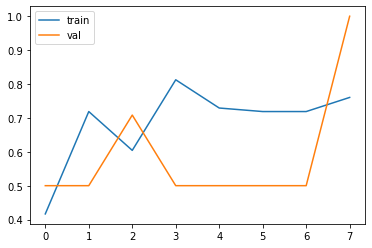

In [20]:
print(history.history['val_accuracy'][-1])
plt.plot(history.epoch,history.history['accuracy'])
plt.plot(history.epoch,history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')

In [21]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob,axis=1)

y_pred_prob[0:7], y_pred[0:7], y_test[0:7]

(array([[0.06257397, 0.5041932 , 0.43323287],
        [0.87976575, 0.06936415, 0.05087012],
        [0.01334539, 0.45143926, 0.5352153 ],
        [0.0741253 , 0.50777364, 0.41810104],
        [0.05295895, 0.515473  , 0.43156803],
        [0.8463793 , 0.08748495, 0.06613577],
        [0.17053016, 0.49460596, 0.33486387]], dtype=float32),
 array([1, 0, 2, 1, 1, 0, 1]),
 array([1, 0, 2, 1, 1, 0, 1]))

## Vanishing and Exploding Gradients 

Recall that during backpropagation the algorithm computes the gradient of the cost function w.r.t each parameter and it uses these gradients to update each parameter with a Gradient Descent step. <br>

<b>Vanishing gradient problem:</b> gradients often get smaller and smaller as the algorithm progresses down to the lower layers $\implies$ lower layers connection weights remain virtually unchanged. <br>

<b>Exploding gradient problem:</b> gradients grow bigger and bigger until layers get insanely large weight updates and the algorithm diverges.

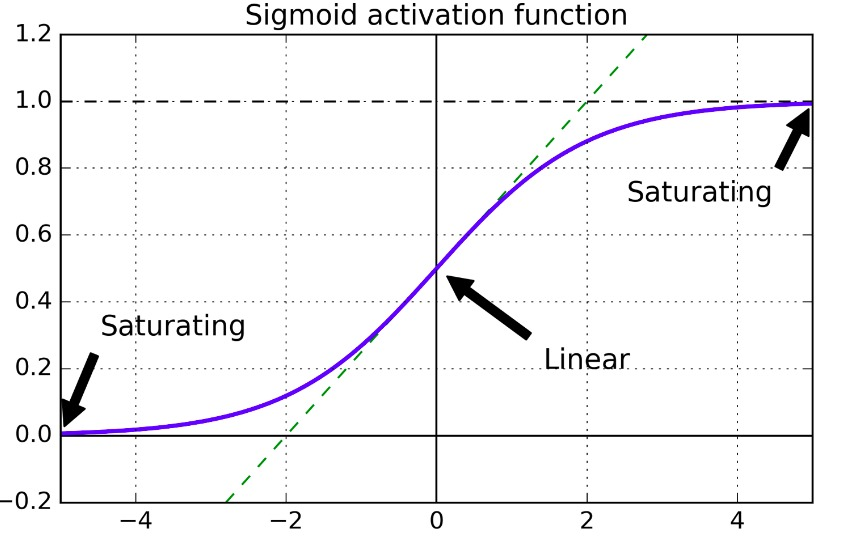

### Initializers

Initialization of neuron weights must be random, otherwise they are collinear and
backpropagation won’t distinguish their contributions to the output error, but you can choose the distribution (standard practice is to use "Glorot" and "HeNormal", which alleviate the problem of unstable gradients)

In [22]:
X, y = bdata.iloc[:,:],boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from tensorflow.keras import initializers

model = keras.models.Sequential()

model.add(keras.layers.Dense(30, input_dim = X.shape[1], activation="relu",
    kernel_initializer=initializers.he_normal()))
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.Dense(1, activation="relu"))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 30)                420       
_________________________________________________________________
dense_11 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 16        
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


### Batch Normalization and Early Stopping

<b> Batch Normalization: </b> after each layer it normalizes the inputs to have mean zero and variance 1. It helps to increase performance, speed up training, and regularize the model

In [23]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, input_dim = X.shape[1], activation="relu",
    kernel_initializer=initializers.he_normal()))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(1, activation="relu"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 30)                420       
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense_14 (Dense)             (None, 15)                465       
_________________________________________________________________
batch_normalization_1 (Batch (None, 15)                60        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 16        
Total params: 1,081
Trainable params: 991
Non-trainable params: 90
_________________________________________________________________


In [24]:
model.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=["mean_squared_error"])

In [25]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model.fit(X_train, y_train, epochs=8,
                    validation_split=0.2, callbacks=[es])

Epoch 1/8
11/11 [==============================] - 0s 31ms/step - loss: 564.4280 - mean_squared_error: 564.4280 - val_loss: 535.1180 - val_mean_squared_error: 535.1180
Epoch 2/8
11/11 [==============================] - 0s 13ms/step - loss: 537.6041 - mean_squared_error: 537.6041 - val_loss: 513.4433 - val_mean_squared_error: 513.4433
Epoch 3/8
11/11 [==============================] - 0s 15ms/step - loss: 524.3103 - mean_squared_error: 524.3103 - val_loss: 501.0786 - val_mean_squared_error: 501.0786
Epoch 4/8
11/11 [==============================] - 0s 14ms/step - loss: 515.3877 - mean_squared_error: 515.3877 - val_loss: 495.4400 - val_mean_squared_error: 495.4400
Epoch 5/8
11/11 [==============================] - 0s 16ms/step - loss: 506.2394 - mean_squared_error: 506.2394 - val_loss: 488.6293 - val_mean_squared_error: 488.6293
Epoch 6/8
11/11 [==============================] - 0s 16ms/step - loss: 497.0059 - mean_squared_error: 497.0059 - val_loss: 479.7079 - val_mean_squared_error: 4

### Alternative Activation Functions

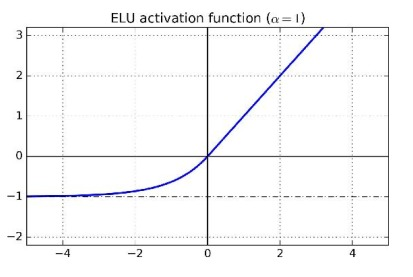 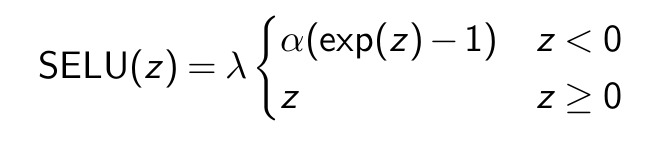

Exponential Linear Unit (ELU) and Scaled ELU (SELU). In particular, SELU enhances the performance of the network, that is a neural network with only dense layers, each using SELU as activation function, the network will self-normalize, provided that:
- inputs are standardized
- it uses LeCun normal initialization for weights
- set $\lambda \approx 1.0507$ and $\alpha \approx 1.6732$
- in general SELU > ELU > ReLU

Note that with SELU batch normalization is not needed as the newtwork self-normalizes

### Optimizer 

Existing research showed that it has a big impact on the performance of the model. <i>Adam</i> (adaptive moment estimation) is faster and almost as good as <i>sgd</i>. 

In [26]:
model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["mean_squared_error"])

es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model.fit(X_train, y_train, epochs=8,
                    validation_split=0.2, callbacks=[es])

Epoch 1/8
11/11 [==============================] - 0s 33ms/step - loss: 221.1264 - mean_squared_error: 221.1264 - val_loss: 143.0572 - val_mean_squared_error: 143.0572
Epoch 2/8
11/11 [==============================] - 0s 13ms/step - loss: 82.6324 - mean_squared_error: 82.6324 - val_loss: 348.9224 - val_mean_squared_error: 348.9224
Epoch 00002: early stopping


### Regularization and Dropout

Neural network parameters, like regressions, can be regularized with L1 and/or L2 penalties to push weak neurons to zero and create a sparse model $\rightarrow$ avoid overfitting.

In [27]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, input_dim = X.shape[1], activation="relu",
    kernel_initializer=initializers.he_normal(), kernel_regularizer = keras.regularizers.l2(0.01)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(1, activation="relu"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 30)                420       
_________________________________________________________________
batch_normalization_2 (Batch (None, 30)                120       
_________________________________________________________________
dense_17 (Dense)             (None, 15)                465       
_________________________________________________________________
batch_normalization_3 (Batch (None, 15)                60        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 16        
Total params: 1,081
Trainable params: 991
Non-trainable params: 90
_________________________________________________________________


Alternatively, use <i>dropout</i> during training (it is NOT used during validation), with probability ($p$) between 10% and 50%. Alternative dropout regularizations are:
- Normal dropout: neurons don't get dropped but coefficients are down-weighted by $p$
- Monte Carlo dropout: continues to allow dropout but produce 100 predictions, and averages them

In [28]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, input_dim = X.shape[1], activation="relu",
    kernel_initializer=initializers.he_normal()))
model.add(keras.layers.BatchNormalization())
keras.layers.Dropout(0.3)
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.BatchNormalization())
keras.layers.Dropout(0.3)
model.add(keras.layers.Dense(1, activation="relu"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 30)                420       
_________________________________________________________________
batch_normalization_4 (Batch (None, 30)                120       
_________________________________________________________________
dense_20 (Dense)             (None, 15)                465       
_________________________________________________________________
batch_normalization_5 (Batch (None, 15)                60        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 16        
Total params: 1,081
Trainable params: 991
Non-trainable params: 90
_________________________________________________________________


## Tuning NN Hyperparameters

It is an active area of research. One option is to try combinations of hyperparameters and see which one works best on the validation set, using GridSearchCV or RandomizedSearchCV

In [29]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_dim=X_train.shape[1]):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(n_neurons, input_dim=input_dim, activation="relu"))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mean_squared_error"])
    return model

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2)

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train, y_train, epochs=16,
               validation_data=(X_val, y_val),
              callbacks=[es])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_test)

Epoch 1/16
11/11 [==============================] - 0s 26ms/step - loss: 447.5432 - mean_squared_error: 447.5432 - val_loss: 197.5182 - val_mean_squared_error: 197.5182
Epoch 2/16
11/11 [==============================] - 0s 15ms/step - loss: 115.4376 - mean_squared_error: 115.4376 - val_loss: 121.8385 - val_mean_squared_error: 121.8385
Epoch 3/16
11/11 [==============================] - 0s 14ms/step - loss: 69.5850 - mean_squared_error: 69.5850 - val_loss: 106.8039 - val_mean_squared_error: 106.8039
Epoch 4/16
11/11 [==============================] - 0s 16ms/step - loss: 65.8825 - mean_squared_error: 65.8825 - val_loss: 110.7874 - val_mean_squared_error: 110.7874
Epoch 00004: early stopping
4/4 [==============================] - 0s 8ms/step - loss: 54.3488 - mean_squared_error: 54.3488


In [30]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_val, y_val),
                  callbacks=[es])


Epoch 1/100
7/7 [==============================] - 0s 49ms/step - loss: 1661.9679 - mean_squared_error: 1661.9679 - val_loss: 724.7923 - val_mean_squared_error: 724.7923
Epoch 2/100
7/7 [==============================] - 0s 24ms/step - loss: 658.8304 - mean_squared_error: 658.8304 - val_loss: 434.1162 - val_mean_squared_error: 434.1162
Epoch 3/100
7/7 [==============================] - 0s 23ms/step - loss: 169.0427 - mean_squared_error: 169.0427 - val_loss: 243.9714 - val_mean_squared_error: 243.9714
Epoch 4/100
7/7 [==============================] - 0s 26ms/step - loss: 205.5246 - mean_squared_error: 205.5246 - val_loss: 123.6968 - val_mean_squared_error: 123.6968
Epoch 5/100
7/7 [==============================] - 0s 19ms/step - loss: 72.4928 - mean_squared_error: 72.4928 - val_loss: 170.4462 - val_mean_squared_error: 170.4462
Epoch 00005: early stopping
4/4 [==============================] - 0s 11ms/step - loss: 102.4958 - mean_squared_error: 102.4958
Epoch 1/100
7/7 [===============

7/7 [==============================] - 0s 13ms/step - loss: 185.2262 - mean_squared_error: 185.2262 - val_loss: 101.0059 - val_mean_squared_error: 101.0059
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 81.4776 - mean_squared_error: 81.4776 - val_loss: 112.8987 - val_mean_squared_error: 112.8987
Epoch 00003: early stopping
4/4 [==============================] - 0s 6ms/step - loss: 64.4798 - mean_squared_error: 64.4798
Epoch 1/100
7/7 [==============================] - 0s 50ms/step - loss: 934.6985 - mean_squared_error: 934.6985 - val_loss: 201.7358 - val_mean_squared_error: 201.7358
Epoch 2/100
7/7 [==============================] - 0s 21ms/step - loss: 159.3969 - mean_squared_error: 159.3969 - val_loss: 135.5205 - val_mean_squared_error: 135.5205
Epoch 3/100
7/7 [==============================] - 0s 18ms/step - loss: 77.5566 - mean_squared_error: 77.5566 - val_loss: 119.0359 - val_mean_squared_error: 119.0359
Epoch 4/100
7/7 [==============================] - 

Epoch 16/100
7/7 [==============================] - 0s 31ms/step - loss: 148.7013 - mean_squared_error: 148.7013 - val_loss: 131.5567 - val_mean_squared_error: 131.5567
Epoch 17/100
7/7 [==============================] - 0s 19ms/step - loss: 130.9414 - mean_squared_error: 130.9414 - val_loss: 119.8454 - val_mean_squared_error: 119.8454
Epoch 18/100
7/7 [==============================] - 0s 21ms/step - loss: 116.9584 - mean_squared_error: 116.9584 - val_loss: 110.7119 - val_mean_squared_error: 110.7119
Epoch 19/100
7/7 [==============================] - 0s 23ms/step - loss: 105.4322 - mean_squared_error: 105.4322 - val_loss: 103.8195 - val_mean_squared_error: 103.8195
Epoch 20/100
7/7 [==============================] - 0s 35ms/step - loss: 96.2463 - mean_squared_error: 96.2463 - val_loss: 99.4432 - val_mean_squared_error: 99.4432
Epoch 21/100
7/7 [==============================] - 0s 28ms/step - loss: 89.5850 - mean_squared_error: 89.5850 - val_loss: 95.7504 - val_mean_squared_error: 95

Epoch 4/100
7/7 [==============================] - 0s 18ms/step - loss: 77.9506 - mean_squared_error: 77.9506 - val_loss: 112.5201 - val_mean_squared_error: 112.5201
Epoch 5/100
7/7 [==============================] - 0s 30ms/step - loss: 67.3434 - mean_squared_error: 67.3434 - val_loss: 100.0748 - val_mean_squared_error: 100.0748
Epoch 6/100
7/7 [==============================] - 0s 40ms/step - loss: 62.9150 - mean_squared_error: 62.9150 - val_loss: 90.0119 - val_mean_squared_error: 90.0119
Epoch 7/100
7/7 [==============================] - 0s 32ms/step - loss: 60.1927 - mean_squared_error: 60.1927 - val_loss: 84.3719 - val_mean_squared_error: 84.3719
Epoch 8/100
7/7 [==============================] - 0s 41ms/step - loss: 59.4852 - mean_squared_error: 59.4852 - val_loss: 83.7679 - val_mean_squared_error: 83.7679
Epoch 9/100
7/7 [==============================] - 0s 16ms/step - loss: 57.5818 - mean_squared_error: 57.5818 - val_loss: 86.3750 - val_mean_squared_error: 86.3750
Epoch 00009:

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fecc6afe610>, as the constructor either does not set or modifies parameter learning_rate

In [31]:
print('Best Parameters: ')
print(rnd_search_cv.best_params_)
print('Best Score: ', rnd_search_cv.best_score_)

Best Parameters: 
{'learning_rate': 0.0003315798231237142, 'n_hidden': 0, 'n_neurons': 81}
Best Score:  -60.195882161458336


However, this approach is quite time consuming, thus, allows you to test only a few combinations of hyperparameters. Some suggestions:
- It is better to have too many layers, and use regularization
- Try between 1 and 5 layers
- Adding layers usually helps more than adding neurons
- Using ReLU in hidden layers is a good baseline